In [17]:
# Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import norm

In [7]:
# Etapa 1: Criação do conjunto de dados

# Definir as características das distribuições normais
np.random.seed(0)  # Para reprodutibilidade
mean1, std1, n_samples1 = 2, 0.8, 240
mean2, std2, n_samples2 = 4, 0.4, 120

# Amostrar os dados para as duas classes
class1_data = np.random.normal(mean1, std1, n_samples1)
class2_data = np.random.normal(mean2, std2, n_samples2)

In [19]:
# Etapa 2: Separar os dados em treinamento e teste

x = np.concatenate((class1_data, class2_data), axis=0)
y = np.concatenate((np.zeros(n_samples1), np.ones(n_samples2)), axis=0)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.10, random_state=42)

In [22]:
# Etapa 3: Treinar o classificador Gaussian Naive Bayes
classifier = GaussianNB()
classifier.fit(xTrain.reshape(-1, 1), yTrain)

GaussianNB()

In [29]:
# Etapa 4: Aplicar o classificador ao conjunto de teste
yPred = classifier.predict(xTest.reshape(-1, 1))

def print_classification_report(yTest, yPred):
    accuracy = accuracy_score(yTest, yPred) * 100

    cm = confusion_matrix(yTest, yPred)
    report = classification_report(yTest, yPred)

    print('Relatório de Classificação:')
    print(f'Percentual de acertos: {accuracy:.2f}%')
    print(f'Percentual de erros: {100 - accuracy:.2f}%\n')

    print('Matriz de Confusão:')
    print(cm)

    print('\nRelatório de Classificação:')
    print(report)
    
print_classification_report(yTest, yPred)

Relatório de Classificação:
Percentual de acertos: 94.44%
Percentual de erros: 5.56%

Matriz de Confusão:
[[22  1]
 [ 1 12]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        23
         1.0       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



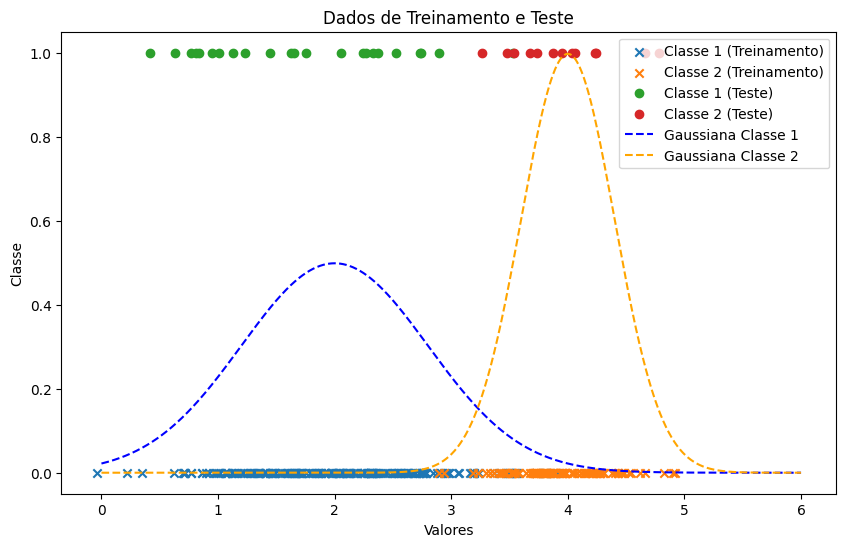

In [28]:
# Etapa 5: Plotar as gaussianas no gráfico
x = np.linspace(0, 6, 1000)
plt.figure(figsize=(10, 6))
plt.scatter(xTrain[yTrain == 0], np.zeros_like(xTrain[yTrain == 0]), marker='x', label='Classe 1 (Treinamento)')
plt.scatter(xTrain[yTrain == 1], np.zeros_like(xTrain[yTrain == 1]), marker='x', label='Classe 2 (Treinamento)')
plt.scatter(xTest[yTest == 0], np.ones_like(xTest[yTest == 0]), marker='o', label='Classe 1 (Teste)')
plt.scatter(xTest[yTest == 1], np.ones_like(xTest[yTest == 1]), marker='o', label='Classe 2 (Teste)')

# Plotar as gaussianas
plt.plot(x, norm.pdf(x, mean1, std1), label='Gaussiana Classe 1', linestyle='--', color='blue')
plt.plot(x, norm.pdf(x, mean2, std2), label='Gaussiana Classe 2', linestyle='--', color='orange')

plt.legend()
plt.title('Dados de Treinamento e Teste')
plt.xlabel('Valores')
plt.ylabel('Classe')
plt.show()